In [3]:
import pandas as pd
import numpy as np
import operator
from itertools import combinations 
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('F:\summer internship\dataset\geochem\GSNSWDataset\ASSAY_SURFSAMP_AuBasePath.csv')
df = df.iloc[:,9:]
df.head()

,Ag_ppm,As_ppm,Au_ppm,Bi_ppm,Co_ppm,Cr_ppm,Cu_ppm,Fe_pct,Li_ppm,Mg_pct,...,Pt_ppm,S_pct,Sb_ppm,Se_ppm,Sn_ppm,Sr_ppm,Te_ppm,Tl_ppm,W_ppm,Zn_ppm
0,38.0,4.0,0.200,NaN,15.0,NaN,600.0,NaN,NaN,NaN,...,NaN,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0
1,0.0,50.0,0.004,NaN,3.0,NaN,120.0,NaN,NaN,NaN,...,NaN,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0
2,0.0,24.0,0.007,NaN,60.0,NaN,330.0,NaN,NaN,NaN,...,NaN,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0
3,0.0,48.0,0.008,NaN,120.0,NaN,240.0,NaN,NaN,NaN,...,NaN,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0
4,0.0,20.0,0.022,NaN,18.0,NaN,86.0,NaN,NaN,NaN,...,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0


In [7]:
pct_col = [col for col in df.columns if '_pct' in col]
print(pct_col)
for col in pct_col:
    df[col] = df[col].apply(lambda x: x*10000)
    
df.columns = [col.split('_')[0] for col in df.columns]

df.head()

['Fe_pct', 'Mg_pct', 'S_pct']


,Ag,As,Au,Bi,Co,Cr,Cu,Fe,Li,Mg,...,Pt,S,Sb,Se,Sn,Sr,Te,Tl,W,Zn
0,38.0,4.0,0.200,NaN,15.0,NaN,600.0,NaN,NaN,NaN,...,NaN,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0
1,0.0,50.0,0.004,NaN,3.0,NaN,120.0,NaN,NaN,NaN,...,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0
2,0.0,24.0,0.007,NaN,60.0,NaN,330.0,NaN,NaN,NaN,...,NaN,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0
3,0.0,48.0,0.008,NaN,120.0,NaN,240.0,NaN,NaN,NaN,...,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0
4,0.0,20.0,0.022,NaN,18.0,NaN,86.0,NaN,NaN,NaN,...,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0


In [8]:
elements_dict = {'Ag': 47,'As': 33,'Au': 79,'Bi': 83,'Co': 27,'Cr': 24,'Cu': 29,'Fe': 26,'Li': 3,'Mg': 12,'Mn': 25,'Mo': 42,'Ni': 28,'Pb': 82,'Pd': 46,'Pt': 78,'S': 16,'Sb': 51,'Se': 34,'Sn': 50,'Sr': 38,'Te': 52,'Tl': 81,'W': 74,'Zn': 30}

sorted_elements_dict= dict(sorted(elements_dict.items(), key=operator.itemgetter(1)))

print(sorted_elements_dict)

{'Li': 3, 'Mg': 12, 'S': 16, 'Cr': 24, 'Mn': 25, 'Fe': 26, 'Co': 27, 'Ni': 28, 'Cu': 29, 'Zn': 30, 'As': 33, 'Se': 34, 'Sr': 38, 'Mo': 42, 'Pd': 46, 'Ag': 47, 'Sn': 50, 'Sb': 51, 'Te': 52, 'W': 74, 'Pt': 78, 'Au': 79, 'Tl': 81, 'Pb': 82, 'Bi': 83}


In [20]:
def find_valid_rows(el_comb):
    print(el_comb)
    valid_rows = []
    for index, row in df[0:10000].iterrows():
        valid_count = 0
        for el in el_comb:
            val = row[el]
            if val != '':
                if float(val) > 0:
                    valid_count += 1
                    val_float = float(val)
            else:
                break
            #print(el, val)
        if valid_count == len(el_comb):
            #print(rw)
            valid_rows.append(row)
            
    print('valid rows',len(valid_rows))
    return valid_rows

In [10]:
def calculate_ratios(row,elements):
    xy = {'X': round(row[elements[0]]/row[elements[1]],2), 'Y': round(row[elements[1]]/row[elements[2]],2)}
    #print(xy)
    return xy

number of combinations 2300
('Li', 'Mg', 'S')
valid rows 353
('Li', 'Mg', 'Cr')
valid rows 800
('Li', 'Mg', 'Mn')
valid rows 802


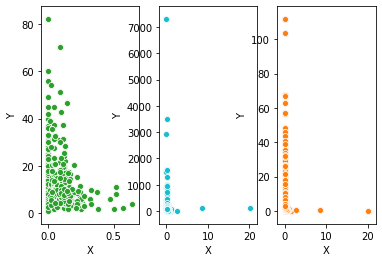

In [21]:
r = 3
elements_comb = list(combinations(list(sorted_elements_dict.keys()), r))
print('number of combinations',len(elements_comb))
#for c in list(elements_comb):
#    print(c)

d = {}

f, axes = plt.subplots(1, 3)

for index, comb in enumerate(elements_comb[0:3]):
    d[comb] = pd.DataFrame()
    valid_rows = find_valid_rows(comb)
    for row in valid_rows:
        new_row = calculate_ratios(row, comb)
        d[comb] = d[comb].append(new_row, ignore_index=True)
        sns.scatterplot(data=d[comb], x="X", y="Y", ax=axes[index])
#print(d)
    